In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("E:/Ineuron Project/training_batch_files/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df['nameOrig'].value_counts()

C1999539787    3
C363736674     3
C1677795071    3
C545315117     3
C1784010646    3
              ..
C1485593818    1
C113053093     1
C397520503     1
C100238705     1
C1343123946    1
Name: nameOrig, Length: 6353307, dtype: int64

In [10]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
# no of unique values
{column: len(df[column].unique()) for column in df.columns}

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

In [12]:
## fraud transaction 
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
print(f"Total number of unique customers are {df.nameOrig.nunique()}")
print(f"Total number of unique recipents are {df.nameDest.nunique()}")

Total number of unique customers are 6353307
Total number of unique recipents are 2722362


<AxesSubplot:>

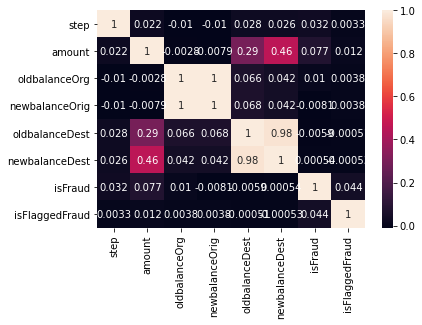

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
##type of transaction
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [19]:
froud_transfer=df[(df['isFraud']==1) & (df['type']=='TRANSFER')]
froud_cashout=df[(df['isFraud']==1) & (df['type']=='CASH_OUT')]
print(len(froud_transfer))
print(len(froud_cashout))

4097
4116


In [20]:
X=df.iloc[:,:9]
X.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [21]:
y=df['isFraud']

In [22]:
##numerical feature distribution
num=[feature for feature in df.columns if df[feature].dtypes=='float64']
num

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

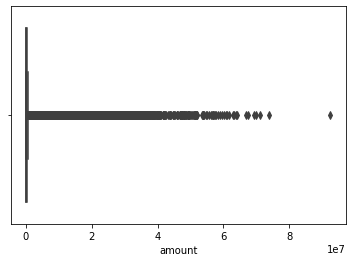

In [23]:
sns.boxplot(df['amount'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

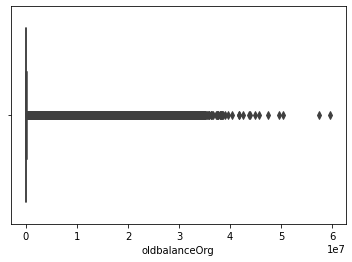

In [24]:
sns.boxplot(df['oldbalanceOrg'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceOrig'>

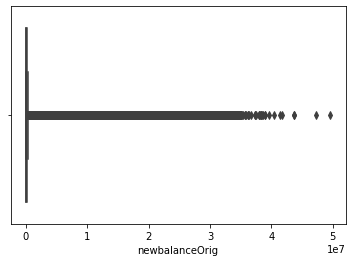

In [25]:
sns.boxplot(df['newbalanceOrig'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest'>

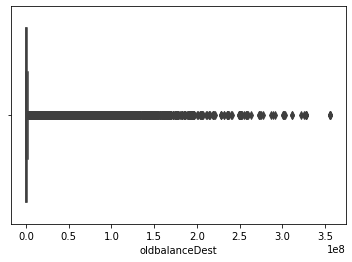

In [26]:
sns.boxplot(df['oldbalanceDest'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceDest'>

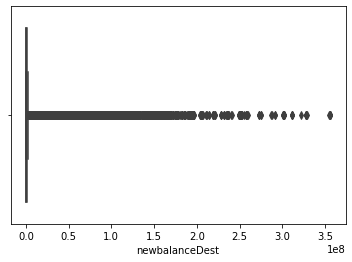

In [27]:
sns.boxplot(df['newbalanceDest'])

In [28]:
#handling the outliers 
df = df.drop(['isFlaggedFraud'],axis=1)
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [29]:
from scipy import stats
z = np.abs(stats.zscore(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]))
print(z)

[[2.81559923e-01 2.29810037e-01 2.37621696e-01 3.23813895e-01
  3.33411405e-01]
 [2.94767262e-01 2.81359380e-01 2.85812295e-01 3.23813895e-01
  3.33411405e-01]
 [2.97554804e-01 2.88653782e-01 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 ...
 [1.01539526e+01 1.89649113e+00 2.92441707e-01 3.03665258e-01
  1.40302700e+00]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 1.59138312e+00
  1.66981230e+00]]


In [30]:
threshold = 3
print(np.where(z > 3))

(array([     84,      88,      89, ..., 6362599, 6362616, 6362617],
      dtype=int64), array([4, 4, 4, ..., 0, 0, 0], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, which mean z[84][4] have a Z-score higher than 3.

In [31]:
df_clean = df[(z < 3).all(axis=1)]
df_clean.shape

(6090589, 10)

In [32]:
#shape of df
df.shape

(6362620, 10)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

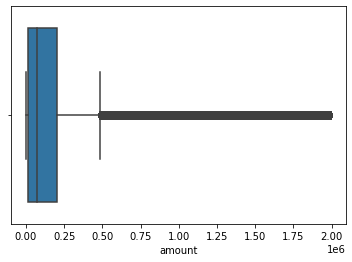

In [33]:
sns.boxplot(df_clean['amount'])

In [34]:
## categorical data
df_cat=pd.get_dummies(df['type'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column    Dtype
---  ------    -----
 0   CASH_IN   uint8
 1   CASH_OUT  uint8
 2   DEBIT     uint8
 3   PAYMENT   uint8
 4   TRANSFER  uint8
dtypes: uint8(5)
memory usage: 30.3 MB


In [35]:
df_clean=pd.concat([df_clean,df_cat],axis=1)
df_clean.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0,0,0,1,0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0,0,0,1,0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0,0,0,0,1
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0,1,0,0,0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0,0,0,1,0


In [36]:
## fraud and non-fraud trasaction in df_clean
df_clean['isFraud'].value_counts()

0.0    6084104
1.0       6485
Name: isFraud, dtype: int64

In [37]:
## balancing the dataset
fraud= df_clean[df_clean.isFraud == 1]
legit= df_clean[df_clean.isFraud == 0]

In [38]:
df_clean.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,,
0.0,242.839546,144631.029706,454638.850957,474521.117296,818627.120285,907732.311040,0.200797,0.361156,0.006695,0.35362,0.077731
1.0,366.257209,465158.785314,463726.430891,458.779644,399102.775224,634305.955593,0.000000,0.499306,0.000000,0.00000,0.500694


Faurd Transaction are due to Cash_out and Transfer type of transaction

In [39]:
from random import sample
legit_sample = legit.sample(n=6485)

In [40]:
balanced_data= pd.concat([legit_sample, fraud], axis= 0)

In [41]:
balanced_data['isFraud'].value_counts()

0.0    6485
1.0    6485
Name: isFraud, dtype: int64

# Correlation in balanced dataset 

<AxesSubplot:>

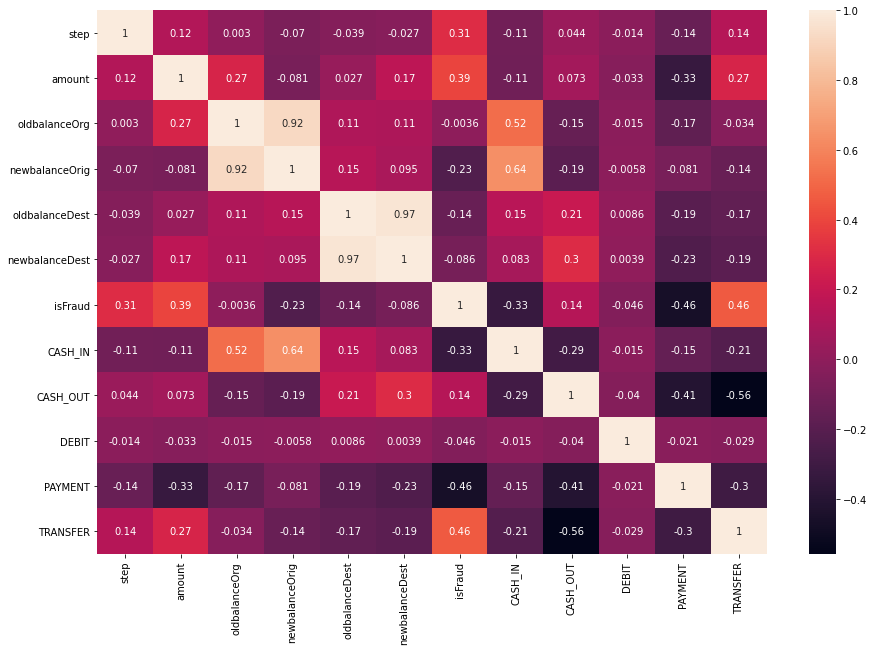

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(balanced_data.corr(),annot=True)

In [44]:
balanced_data.to_csv("data_preprocessing_.csv", index=False)

In [45]:
# Model Building
from sklearn.model_selection import train_test_split

X = balanced_data[['step','amount','oldbalanceOrg','oldbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
Y = balanced_data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [46]:
# ml classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1=rf.predict(X_test)
rf.score(X_test,y_test)

0.98278077615009

In [48]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1827   51]
 [  16 1997]]
0.98278077615009
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1878
         1.0       0.98      0.99      0.98      2013

    accuracy                           0.98      3891
   macro avg       0.98      0.98      0.98      3891
weighted avg       0.98      0.98      0.98      3891



In [52]:
##LoisticRegression 
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred2=lr.predict(X_test)
lr.score(X_test,y_test)

0.6553585196607556

In [53]:
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 768 1110]
 [ 231 1782]]
0.6553585196607556
              precision    recall  f1-score   support

         0.0       0.77      0.41      0.53      1878
         1.0       0.62      0.89      0.73      2013

    accuracy                           0.66      3891
   macro avg       0.69      0.65      0.63      3891
weighted avg       0.69      0.66      0.63      3891



In [57]:
## GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred3=gnb.predict(X_test)
gnb.score(X_test,y_test)

0.7509637625289128

In [58]:
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[1481  397]
 [ 572 1441]]
0.7509637625289128
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      1878
         1.0       0.78      0.72      0.75      2013

    accuracy                           0.75      3891
   macro avg       0.75      0.75      0.75      3891
weighted avg       0.75      0.75      0.75      3891



In [60]:
# KNN NNeighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred4=knn.predict(X_test)
knn.score(X_test,y_test)

0.9493703418144436

In [61]:
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[1754  124]
 [  73 1940]]
0.9493703418144436
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      1878
         1.0       0.94      0.96      0.95      2013

    accuracy                           0.95      3891
   macro avg       0.95      0.95      0.95      3891
weighted avg       0.95      0.95      0.95      3891



In [65]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred5=xgb.predict(X_test)
xgb.score(X_test,y_test)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9876638396299152

In [66]:
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[1841   37]
 [  11 2002]]
0.9876638396299152
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1878
         1.0       0.98      0.99      0.99      2013

    accuracy                           0.99      3891
   macro avg       0.99      0.99      0.99      3891
weighted avg       0.99      0.99      0.99      3891



In [68]:
import joblib
joblib.dump(xgb,'XGB_Classifier.pkl')

['XGB_Classifier.pkl']